# Usage example for lmdiag
Source: https://github.com/dynobo/lmdiag

### Imports and configure plot style

In [1]:
import lmdiag
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

plt.style.use("seaborn-v0_8")

%matplotlib inline

### Generate some sample data

In [2]:
np.random.seed(20)
predictor = np.random.normal(size=30, loc=20, scale=3)
response = 5 + 5 * predictor + np.random.normal(size=30)
X = sm.add_constant(predictor)

### Print all plots as matrix

**Using `statsmodels`:**

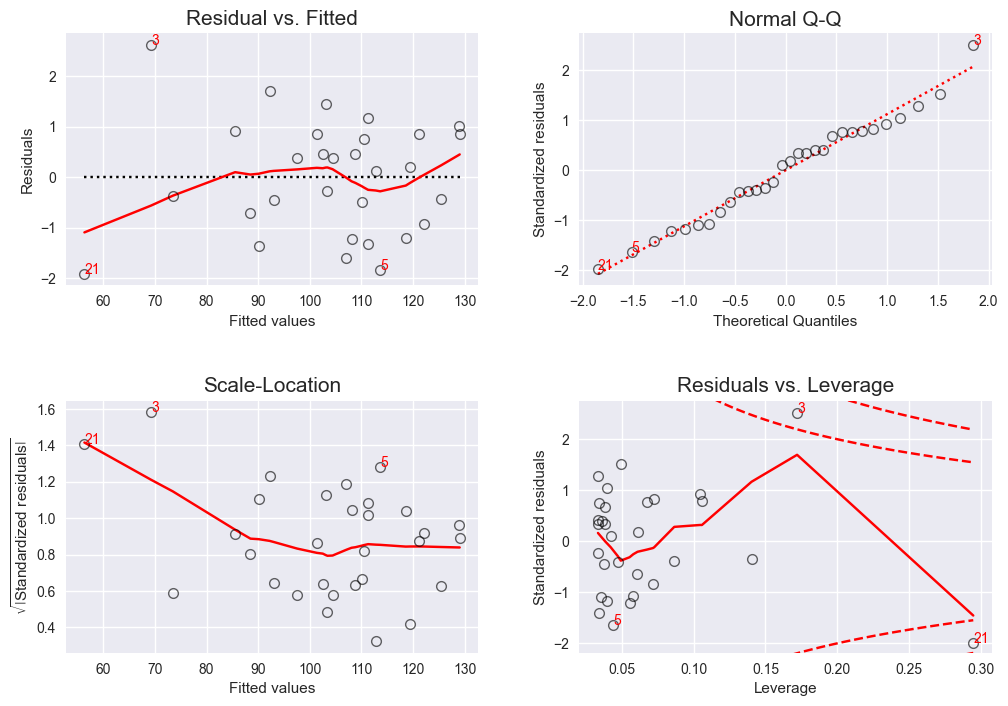

In [3]:
statsmodels_lm = sm.OLS(response, X).fit()
lmdiag.plot(statsmodels_lm);

**Using `linearmodels`:**

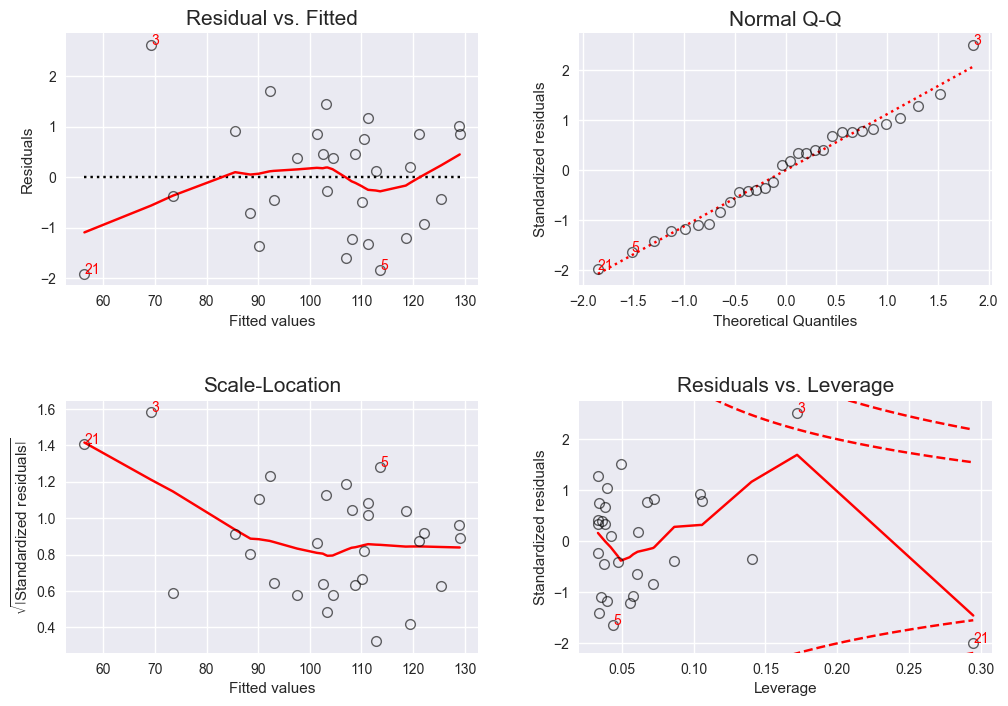

In [4]:
linearmodels_lm = IV2SLS(response,X, None, None).fit(cov_type="unadjusted")
lmdiag.plot(linearmodels_lm);

### Plot the charts individually

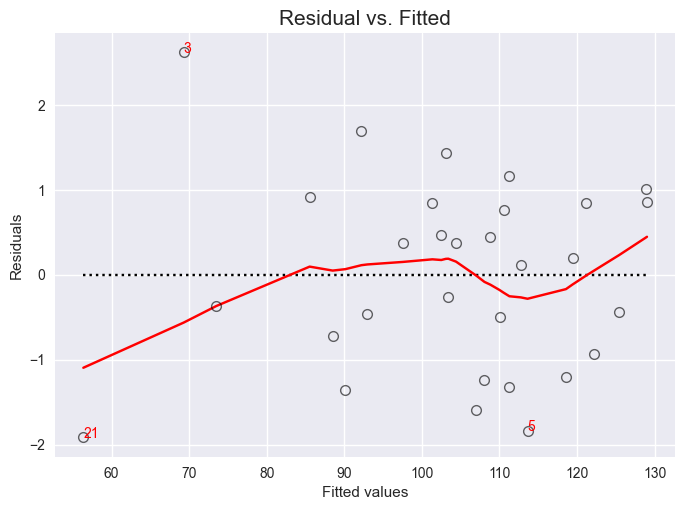

In [5]:
lmdiag.resid_fit(statsmodels_lm);

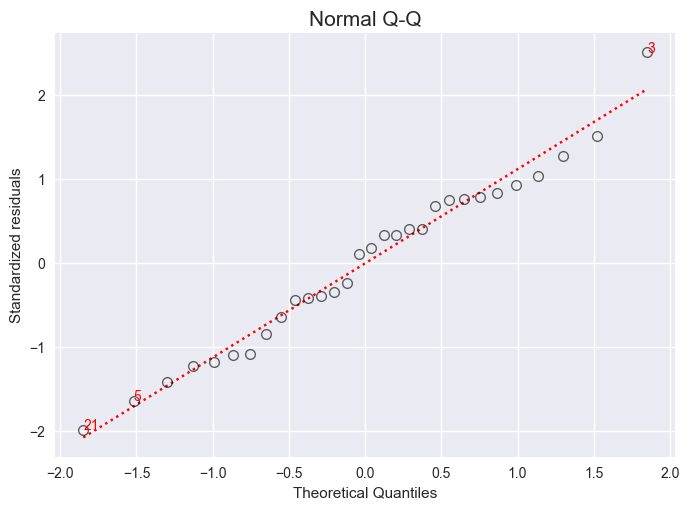

In [6]:
lmdiag.q_q(statsmodels_lm);

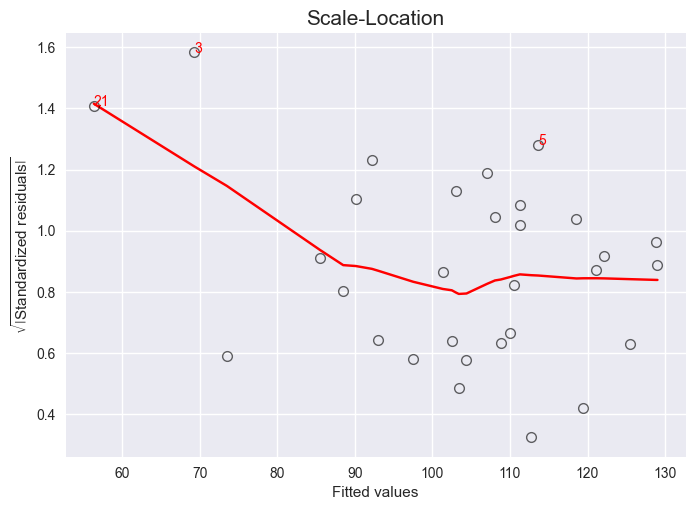

In [7]:
lmdiag.scale_loc(statsmodels_lm);

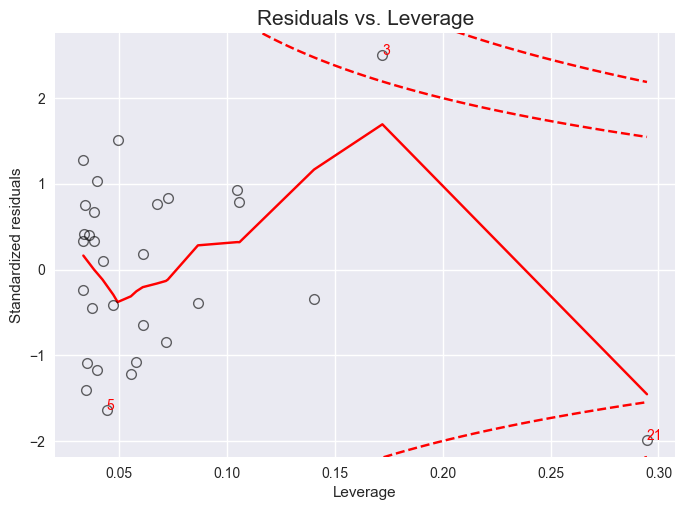

In [8]:
lmdiag.resid_lev(statsmodels_lm);

### Print useful descriptions for interpretation

**For all available charts:**

In [9]:
lmdiag.info()

        Name: Residuals vs. Fitted

      Method: lmdiag.resid_fit(lm)

      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)

      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)

 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

        Name: Normal Q-Q

      Method: lmdiag.q_q(lm)

      x-Axis: Theoretical Quantiles (Quantiles from the Normal Distribution)

      y-Axis: Standardized residuals (Quanti

**Or for individual chart:**

In [10]:
lmdiag.info("resid_fit")

# Some with other charts:
# lmdiag.info('q_q')
# lmdiag.info('scale_loc')
# lmdiag.info('resid_lev')

        Name: Residuals vs. Fitted

      Method: lmdiag.resid_fit(lm)

      x-Axis: Fitted Values (The dependent variable of your model; What you
              threw in statsmodels OLS as 1st parameter)

      y-Axis: Residuals (The "error" of the model; Distance to the fitted
              regression line)

 Description: It's purpose is to identify non-linear patterns in the residuals.
              If you see a horizontal red line and the points spread around it
              without a recognizable pattern, chances are good, that there is
              no non-linear relationship in the data. If you can see clear
              pattern or a curve, a linear model might not be the best
              choice.The red labels show the indices of three observations with
              the highest absolute residuals.

